<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/multipleMinimumFrequentPatterns/basic/CFPGrowthPlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Frequent patterns in Transactional Databases using CFPGrowthPlus Algorithm

In this tutorial, we will discuss the first approaches to find frequent patterns in big data using CFPGrowthPlus algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single beta value

***

## <a id='basicApproach'>Basic approach: Executing CFPGrowthPlus on a single dataset at a particular beta value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 0.1 : Downloading the inputFile

In [2]:
!wget https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv

--2024-10-24 13:50:51--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.31.244.160, 150.95.161.176
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.31.244.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv.1’

Transactional_T10I4 100%[===================>]   3.83M   811KB/s    in 4.8s    

2024-10-24 13:50:57 (811 KB/s) - ‘Transactional_T10I4D100K.csv.1’ saved [4019277/4019277]



#### Step 0.2 : Creating an MIS_T10.txt File

In [3]:
from PAMI.extras.calculateMISValues import usingBeta as ub
inputFile = "Transactional_T10I4D100K.csv"
beta = 0.1
LS = 400
sep = "\t"
output = "MIS_T10.txt"
cd = ub.usingBeta(inputFile, beta, LS, sep)
cd.calculateMIS()
cd.save(output)

#### Step 1: Import the CFPGrowthPlus algorithm

In [4]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowthPlus as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Transactional_T10I4D100K.csv'

MIS = 'MIS_T10.txt'

seperator='\t'

#### Step 3: Execute the CFPGrowthPlus algorithm

In [6]:
obj = alg.CFPGrowthPlus(iFile=inputFile, MIS=MIS, sep=seperator)    #initialize
obj.mine()            #Start the mining process

Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 1983


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 15.221588611602783


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 621088768
Memory (USS): 566169600


# Advanced Tutorial on Implementing CFPGrowthPlus Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using CFPGrowthPlus algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple beta values.

***

#### In this tutorial, we explain how the CFPGrowthPlus algorithm can be implemented by varying the beta values

#### Step 1: Import the CFPGrowthPlus algorithm and pandas data frame

In [12]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowthPlus as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
betaList = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CFPGrowthPlus algorithm

#### Step 3: Execute the CFPGrowthPlus algorithm using different beta values

In [14]:
for beta in betaList:
  from PAMI.extras.calculateMISValues import usingBeta as ub
  inputFile = "Transactional_T10I4D100K.csv"
  beta = beta
  LS = 100
  sep = "\t"
  MISfile = "MIS_T10.txt"
  cd = ub.usingBeta(inputFile, beta, LS, sep)
  cd.calculateMIS()
  cd.save(MISfile)
  obj = alg.CFPGrowthPlus(iFile=inputFile, MIS=MISfile, sep=seperator)
  obj.mine()
#store the results in the data frame
  result.loc[result.shape[0]] = ['CFPGrowthPlus', beta, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm
Frequent patterns were generated successfully using Conditional Frequent Pattern Growth algorithm


In [15]:
print(result)

       algorithm  minSup  patterns    runtime     memory
0  CFPGrowthPlus     0.1     22827  21.847227  664973312
1  CFPGrowthPlus     0.2     14423  23.350201  660336640
2  CFPGrowthPlus     0.3      9883  20.530882  658436096
3  CFPGrowthPlus     0.4      7005  18.136225  661266432
4  CFPGrowthPlus     0.5      4947  19.230281  657379328
5  CFPGrowthPlus     0.6      3581  18.778890  657174528
6  CFPGrowthPlus     0.7      2814  20.005580  659423232
7  CFPGrowthPlus     0.8      2166  19.727741  659677184
8  CFPGrowthPlus     0.9      1475  18.775949  655007744
9  CFPGrowthPlus     1.0       798  20.039713  655163392


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

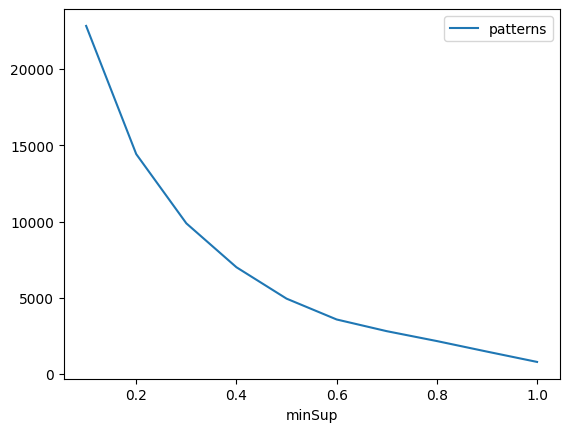

Graph for No Of Patterns is successfully generated!


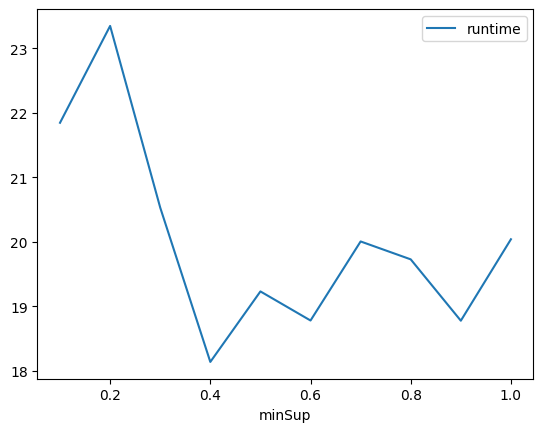

Graph for Runtime taken is successfully generated!


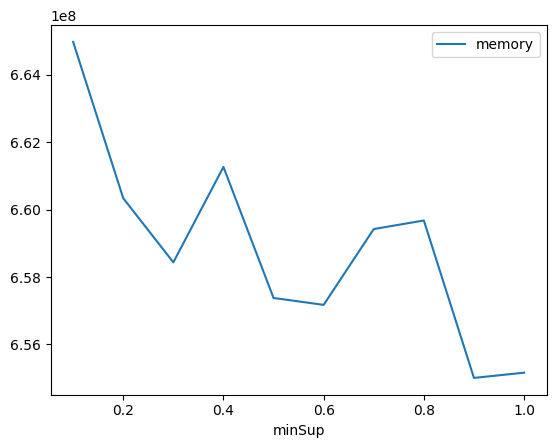

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [21]:
from PAMI.extras.graph import DF2Tex as tex
obj = tex.DF2Tex()
obj.generateLatexCode(result, "minSup", "patterns", "algorithm")
obj.print_latex()
obj.save("patternsCFPGrowthPlus.tex")

\begin{axis}[
	xlabel={\Huge{minSup}},
	ylabel={\Huge{patterns}},
	xmin=0.1, xmax=1.0,]
\addplot+  [red]
	coordinates {
(0.1,22827)
(0.2,14423)
(0.3,9883)
(0.4,7005)
(0.5,4947)
(0.6,3581)
(0.7,2814)
(0.8,2166)
(0.9,1475)
(1.0,798)
	};   \addlegendentry{CFPGrowthPlus}
\end{axis}
LaTeX file saved as patternsCFPGrowthPlus.tex
